# Introduction

##### This project explores a **Superstore Sales dataset** to simulate the responsibilities of a real-world data analyst. The dataset contains 9,800+ records of retail transactions including product names, sales, category, region, and time of purchase.

Using **Pandas** for data wrangling and **Matplotlib/Seaborn** for visualizations, we aim to answer key business questions:
- What products and regions perform best?
- When does the company make most of its sales?
- Are discounts helping or hurting?
- Which categories or cities need attention?

The goal is to derive **data-driven insights** that would support better business decisions across sales, marketing, and operations.

## Phase1-Data Understanding

### 1.1-Load dataset

In [3]:

import pandas as pd
df=pd.read_csv("train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### 1.2-Basic Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
print(df.shape)
print(df.columns)
print(df.describe(include='all'))

(9800, 18)
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')
             Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
count   9800.000000            9800        9800        9800            9800   
unique          NaN            4922        1230        1326               4   
top             NaN  CA-2018-100111  05/09/2017  26/09/2018  Standard Class   
freq            NaN              14          38          34            5859   
mean    4900.500000             NaN         NaN         NaN             NaN   
std     2829.160653             NaN         NaN         NaN             NaN   
min        1.000000             NaN         NaN         NaN             NaN   
25%     2450.750000             NaN         NaN         NaN             NaN   
50

In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

### 1.3-Correcting Date Type

In [7]:
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['Ship Date']=pd.to_datetime(df['Ship Date'],errors='coerce')
print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object


c:\Users\abdul\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\abdul\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\abdul\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\abdul\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/08/2015' in DD/MM/YYYY format. Provide format or specif

## PHASE 2: Trends, Grouping & Business Insights

### 2.1-Add Time Features

In [8]:
df['Order_Year']=df['Order Date'].dt.year
df['Order_Month']=df['Order Date'].dt.month
df['Order_Weekday']=df['Order Date'].dt.weekday
df[['Order_Year','Order_Month','Order_Weekday']].head()

,Order_Year,Order_Month,Order_Weekday
0,2017,8,4
1,2017,8,4
2,2017,12,2
3,2016,11,3
4,2016,11,3


### 2.2-Total Sales by Category

Category
Technology         827455.8730
Office Supplies    705422.3340
Furniture          728658.5757
Name: Sales, dtype: float64


<Axes: title={'center': 'Total Sales by Category'}, xlabel='Category'>

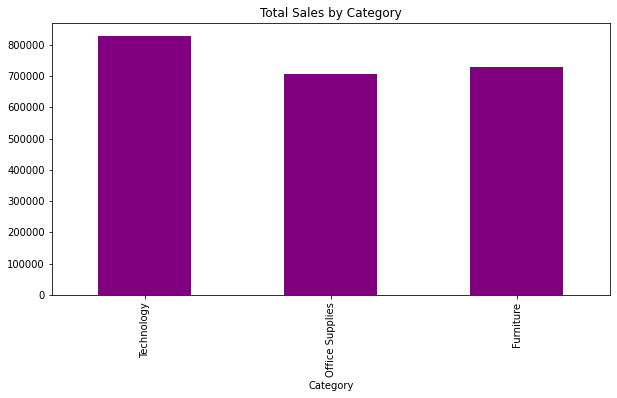

In [9]:
category_sales=df.groupby('Category')['Sales'].sum().sort_index(ascending=False)
print(category_sales)
category_sales.plot(kind='bar', figsize=(10, 5), title='Total Sales by Category',color='purple')

## 2.2-Top 10 Products by Revenue 

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


<Axes: title={'center': 'Top 10 Products by Revenue'}, xlabel='Product Name'>

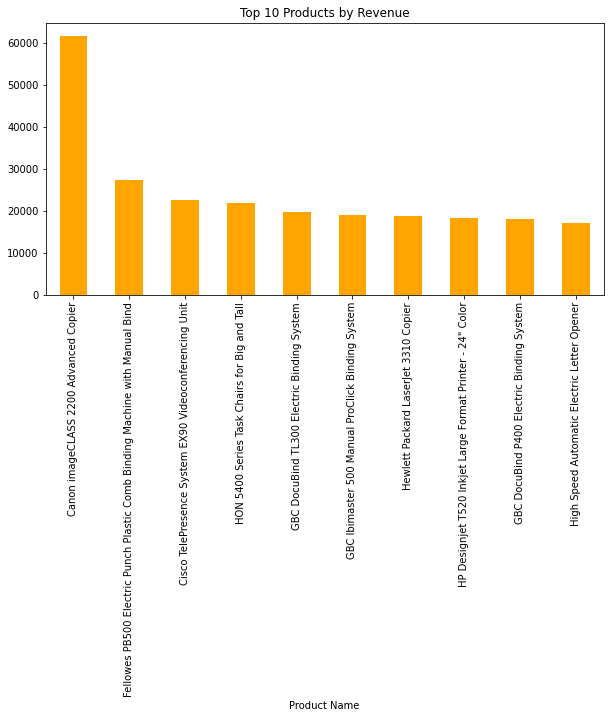

In [10]:
top_products=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)
top_products.plot(kind='bar', figsize=(10, 5), title='Top 10 Products by Revenue', color='orange')

### 2.3-Monthly Sales Trend

Order_Year  Order_Month
2015        1              28828.2540
            2              12588.4840
            3              54027.6920
            4              24710.0160
            5              29520.4900
            6              29181.3346
            7              35194.5580
            8              37349.2655
            9              65956.3998
            10             34561.9470
            11             64369.4565
            12             63568.3107
2016        1              29347.3864
            2              20728.3520
            3              34489.6776
            4              38056.9685
            5              30761.5585
            6              28515.9082
            7              28573.3100
            8              49076.9300
            9              65352.9970
            10             31631.8890
            11             50009.1450
            12             52891.8832
2017        1              38048.1840
            2             

<Axes: title={'center': 'Monthly Sales'}, xlabel='Order_Year,Order_Month'>

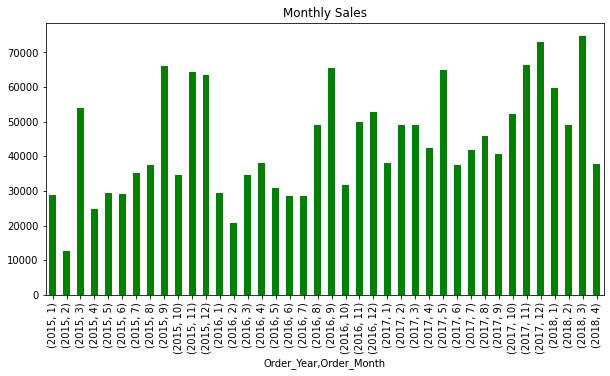

In [13]:
monthly_sales=df.groupby(['Order_Year','Order_Month'])['Sales'].sum().head(40)
print(monthly_sales)
monthly_sales.plot(kind='bar',figsize=(10, 5), title='Monthly Sales', color='green')

### 2.4-Regional Sales

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


<Axes: title={'center': 'Total Sales by Region'}, xlabel='Region'>

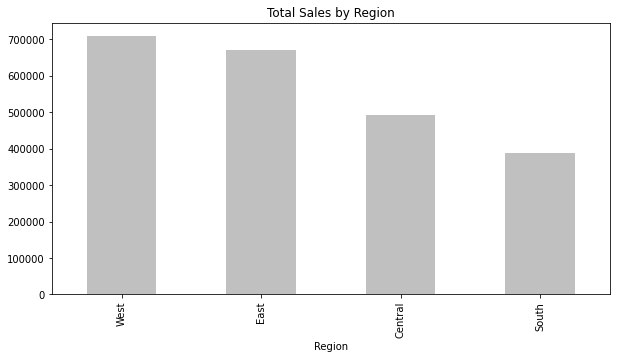

In [15]:
Regional_sales=df.groupby("Region")['Sales'].sum().sort_values(ascending=False)
print(Regional_sales)
Regional_sales.plot(kind='bar', figsize=(10, 5), title='Total Sales by Region', color='silver')

## PHASE 3: Advanced Grouping & Business Insights

### Installing libraries for visualization

In [16]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

### 3.1-Sales by Category + Region

#### Which category performs best in each region?

In [22]:
cat_region=df.groupby(['Category','Region'])['Sales'].sum().sort_values(ascending=False)
print(cat_region)

Category         Region 
Technology       East       263116.5270
                 West       247404.9300
Furniture        West       245348.2455
Office Supplies  West       217466.5090
Furniture        East       206461.3880
Office Supplies  East       199940.8110
Technology       Central    168739.2080
Office Supplies  Central    163590.2430
Furniture        Central    160317.4622
Technology       South      148195.2080
Office Supplies  South      124424.7710
Furniture        South      116531.4800
Name: Sales, dtype: float64


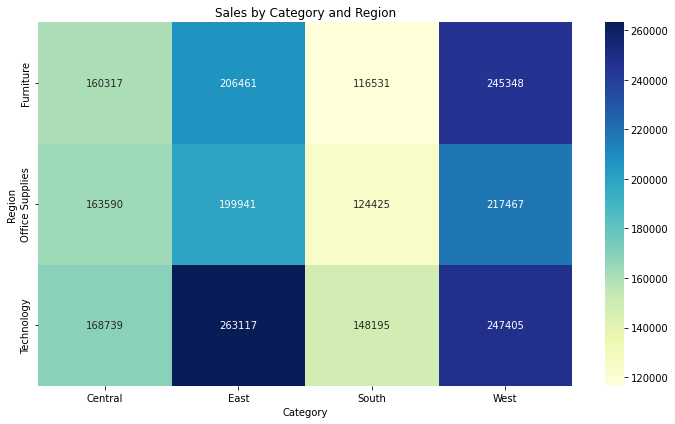

In [23]:
#Visualization
pivot=df.pivot_table(values='Sales',index='Category',columns='Region',aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales by Category and Region")
plt.ylabel("Region")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

###  3.2-Top 10 Products by Units Sold

####  Which 10 products were sold the most?

In [24]:
top_10_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_10_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


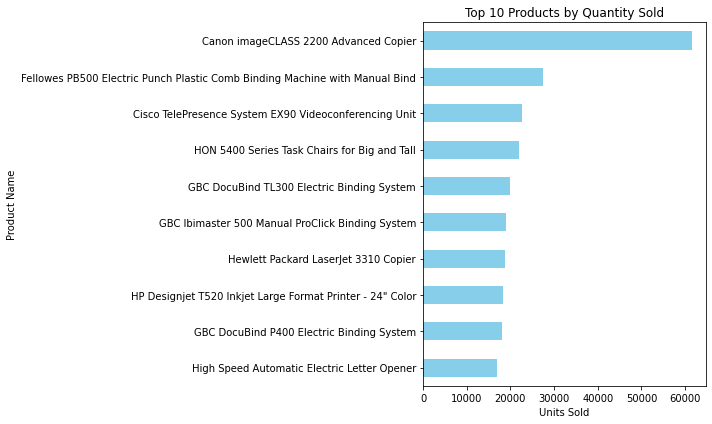

In [25]:
# visualization 
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='barh', color='skyblue')
plt.xlabel("Units Sold")
plt.title("Top 10 Products by Quantity Sold")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 3.3 Top 10 States by Sales

####  Which states earned the highest sales?

In [29]:
top_10_states= df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_10_states)

State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: Sales, dtype: float64


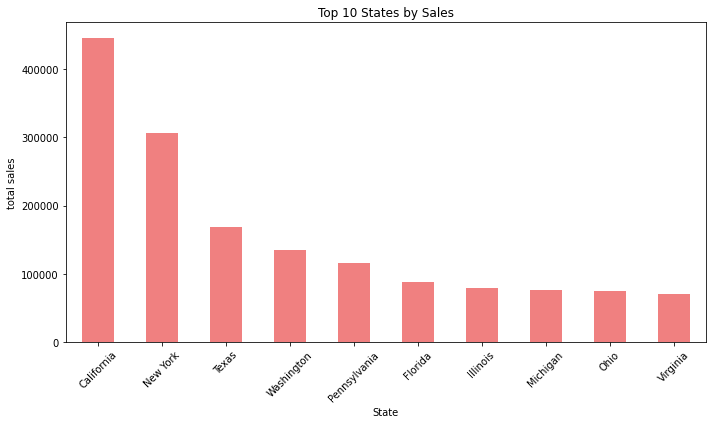

In [31]:
# visualization
plt.figure(figsize=(10,6))
top_10_states.plot(kind='bar',color='lightcoral')
plt.ylabel('total sales')
plt.title('Top 10 States by Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.4-Monthly Sales Trend by Category

#### What is the monthly sales trend for each category over time?

In [32]:
monthly_sales = df.groupby(['Order_Year', 'Order_Month', 'Category'])['Sales'].sum().reset_index()
print(monthly_sales.head())

   Order_Year  Order_Month         Category      Sales
0        2015            1        Furniture  12012.318
1        2015            1  Office Supplies   8415.456
2        2015            1       Technology   8400.480
3        2015            2        Furniture   1739.330
4        2015            2  Office Supplies   4803.566


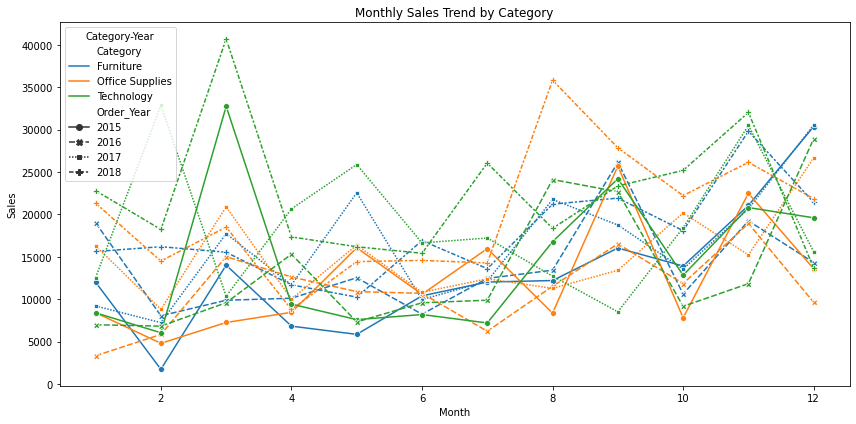

In [33]:
# visualization 
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Order_Month', y='Sales', hue='Category', style='Order_Year', markers=True)
plt.title("Monthly Sales Trend by Category")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(title='Category-Year')
plt.tight_layout()
plt.show()


# Conclusion

#####

Through this project, I applied the full cycle of **Exploratory Data Analysis** (EDA):
- Loaded and cleaned the dataset
- Handled missing and duplicate values
- Created new time-based features
- Grouped, aggregated, and visualized the data
- Answered business-critical questions

###  Key Business Insights:
- Technology category earns the most revenue
- Western and Eastern regions are top-performing
- California and New York dominate sales
- Highest sales occur in  (especially Nov–Dec)

This project allowed me to practice hands-on skills in Python, data cleaning, visualizations, and business analysis. It will be part of my **Data Analyst portfolio** and help showcase my readiness for real-world roles.
